# Bank - Logistic Regression

# Importar librerias

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('bank.csv', sep = ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [149]:
data.shape

(4119, 21)

In [151]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [153]:
X = data.loc[:,data.columns != 'y']
y = data.loc[:,'y']


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size = 0.75,
                                                    test_size = 0.25,
                                                   random_state = 1)

# random_state es para empezar el shuffle en el mismo lugar y que lo random sea siempre lo mismo

## Limpieza datos

In [28]:
X_train.contact.unique()

array(['cellular', 'telephone'], dtype=object)

In [ ]:
# encode manual 

In [155]:
y_train = np.where(y_train == 'yes', 1, 0)
y_test = np.where(y_test == 'yes', 1, 0)
y_test

array([0, 0, 1, ..., 1, 1, 0])

In [157]:
X_train.default = np.where(X_train.default == 'yes', 1, 0)
X_test.default = np.where(X_test.default == 'yes', 1, 0)
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3306,35,entrepreneur,married,high.school,0,yes,no,cellular,nov,mon,131,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
137,34,admin.,married,university.degree,0,no,no,cellular,nov,mon,141,2,999,0,nonexistent,-1.1,94.767,-50.8,1.050,4963.6
973,49,unemployed,married,professional.course,0,no,no,cellular,jun,fri,317,1,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2
797,23,admin.,single,university.degree,0,yes,no,cellular,jul,wed,104,1,999,2,failure,-1.7,94.215,-40.3,0.881,4991.6
1333,56,retired,married,basic.4y,0,no,no,cellular,aug,wed,687,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,30,blue-collar,single,basic.9y,0,yes,no,cellular,nov,thu,71,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
2763,23,blue-collar,single,basic.9y,0,no,no,cellular,jul,thu,250,4,999,1,failure,-1.7,94.215,-40.3,0.846,4991.6
905,77,retired,divorced,professional.course,0,no,no,cellular,aug,mon,258,1,999,0,nonexistent,-1.7,94.027,-38.3,0.898,4991.6
3980,43,blue-collar,married,basic.6y,0,yes,no,cellular,jun,mon,458,6,999,0,nonexistent,-2.9,92.963,-40.8,1.281,5076.2


In [159]:
X_train.housing = np.where(X_train.housing == 'yes', 1, 0)
X_test.housing = np.where(X_test.housing == 'yes', 1, 0)
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3306,35,entrepreneur,married,high.school,0,1,no,cellular,nov,mon,131,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
137,34,admin.,married,university.degree,0,0,no,cellular,nov,mon,141,2,999,0,nonexistent,-1.1,94.767,-50.8,1.050,4963.6
973,49,unemployed,married,professional.course,0,0,no,cellular,jun,fri,317,1,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2
797,23,admin.,single,university.degree,0,1,no,cellular,jul,wed,104,1,999,2,failure,-1.7,94.215,-40.3,0.881,4991.6
1333,56,retired,married,basic.4y,0,0,no,cellular,aug,wed,687,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,30,blue-collar,single,basic.9y,0,1,no,cellular,nov,thu,71,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
2763,23,blue-collar,single,basic.9y,0,0,no,cellular,jul,thu,250,4,999,1,failure,-1.7,94.215,-40.3,0.846,4991.6
905,77,retired,divorced,professional.course,0,0,no,cellular,aug,mon,258,1,999,0,nonexistent,-1.7,94.027,-38.3,0.898,4991.6
3980,43,blue-collar,married,basic.6y,0,1,no,cellular,jun,mon,458,6,999,0,nonexistent,-2.9,92.963,-40.8,1.281,5076.2


In [161]:
X_train.loan = np.where(X_train.loan == 'yes', 1, 0)
X_test.loan = np.where(X_test.loan == 'yes', 1, 0)
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3306,35,entrepreneur,married,high.school,0,1,0,cellular,nov,mon,131,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
137,34,admin.,married,university.degree,0,0,0,cellular,nov,mon,141,2,999,0,nonexistent,-1.1,94.767,-50.8,1.050,4963.6
973,49,unemployed,married,professional.course,0,0,0,cellular,jun,fri,317,1,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2
797,23,admin.,single,university.degree,0,1,0,cellular,jul,wed,104,1,999,2,failure,-1.7,94.215,-40.3,0.881,4991.6
1333,56,retired,married,basic.4y,0,0,0,cellular,aug,wed,687,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,30,blue-collar,single,basic.9y,0,1,0,cellular,nov,thu,71,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
2763,23,blue-collar,single,basic.9y,0,0,0,cellular,jul,thu,250,4,999,1,failure,-1.7,94.215,-40.3,0.846,4991.6
905,77,retired,divorced,professional.course,0,0,0,cellular,aug,mon,258,1,999,0,nonexistent,-1.7,94.027,-38.3,0.898,4991.6
3980,43,blue-collar,married,basic.6y,0,1,0,cellular,jun,mon,458,6,999,0,nonexistent,-2.9,92.963,-40.8,1.281,5076.2


## Modificar resto de categoricas

In [ ]:
# Entender cuales son los valores únicos de una vriable categorica
# para saber como sustituirlos y si es posible agruparlos antes de sustituirlos

In [50]:
X_train.education.unique()

array(['high.school', 'university.degree', 'professional.course',
       'basic.4y', 'basic.9y', 'unknown', 'basic.6y', 'illiterate'],
      dtype=object)

In [163]:
X_train.education = X_train.education.map({'high.school': 'High School',
                                           'university.degree': 'Universitario',
                                           'professional.course': 'Profesional',
                                            'basic.4y' : 'Basic',
                                            'basic.9y': 'Basic', 
                                           'unknown': 'Desconocido', 
                                           'basic.6y' : 'Basic', 
                                           'illiterate':'Iliterate'})
                                           


In [165]:
X_test.education = X_test.education.map({'high.school': 'High School',
                                           'university.degree': 'Universitario',
                                           'professional.course': 'Profesional',
                                            'basic.4y' : 'Basic',
                                            'basic.9y': 'Basic', 
                                           'unknown': 'Desconocido', 
                                           'basic.6y' : 'Basic', 
                                           'illiterate':'Iliterate'})

In [58]:
X_train.education.unique()

array(['High School', 'Universitario', 'Profesional', 'Basic',
       'Desconocido', 'Iliterate'], dtype=object)

In [62]:
X_test.education.unique()

array(['Basic', 'Universitario', 'High School', 'Profesional',
       'Desconocido'], dtype=object)

In [ ]:
# X_test no tiene iliterate porque solo hay 1 y ha caido en X_train

In [66]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3306,35,entrepreneur,married,High School,0,1,0,cellular,nov,mon,131,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
137,34,admin.,married,Universitario,0,0,0,cellular,nov,mon,141,2,999,0,nonexistent,-1.1,94.767,-50.8,1.050,4963.6
973,49,unemployed,married,Profesional,0,0,0,cellular,jun,fri,317,1,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2
797,23,admin.,single,Universitario,0,1,0,cellular,jul,wed,104,1,999,2,failure,-1.7,94.215,-40.3,0.881,4991.6
1333,56,retired,married,Basic,0,0,0,cellular,aug,wed,687,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


In [68]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [70]:
len(X_train.columns)

20

In [83]:
for i in X_train.columns:
    print(f'{i}: {type(X_train[i][0])}')

age: <class 'numpy.int64'>
job: <class 'str'>
marital: <class 'str'>
education: <class 'str'>
default: <class 'numpy.int32'>
housing: <class 'numpy.int32'>
loan: <class 'numpy.int32'>
contact: <class 'str'>
month: <class 'str'>
day_of_week: <class 'str'>
duration: <class 'numpy.int64'>
campaign: <class 'numpy.int64'>
pdays: <class 'numpy.int64'>
previous: <class 'numpy.int64'>
poutcome: <class 'str'>
emp.var.rate: <class 'numpy.float64'>
cons.price.idx: <class 'numpy.float64'>
cons.conf.idx: <class 'numpy.float64'>
euribor3m: <class 'numpy.float64'>
nr.employed: <class 'numpy.float64'>


## Generacion de Dummies

In [ ]:
# Crear dummies para las variables categóricas

In [167]:
X_train = pd.get_dummies(X_train, 
                         columns = ["job", "marital", "education", "contact", "month", "day_of_week",
              "poutcome"],
    drop_first = True)

In [169]:
X_train.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_Desconocido', 'education_High School', 'education_Iliterate',
       'education_Profesional', 'education_Universitario', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [93]:
X_train.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
3306,35,0,1,0,131,2,999,0,-0.1,93.200,...,False,True,False,False,True,False,False,False,True,False
137,34,0,0,0,141,2,999,0,-1.1,94.767,...,False,True,False,False,True,False,False,False,True,False
973,49,0,0,0,317,1,999,0,-2.9,92.963,...,False,False,False,False,False,False,False,False,True,False
797,23,0,1,0,104,1,999,2,-1.7,94.215,...,False,False,False,False,False,False,False,True,False,False
1333,56,0,0,0,687,2,999,0,1.4,93.444,...,False,False,False,False,False,False,False,True,True,False


In [171]:
X_test = pd.get_dummies(X_test, 
                         columns = ["job", "marital", "education", "contact", "month", "day_of_week",
              "poutcome"],
    drop_first = True)

In [173]:
len(X_test.columns)

47

In [175]:
# Quitas esta columna porque solo hay un dato y solo salía en X_train y no en X_test

X_train.drop(columns = 'education_Iliterate', inplace=True, axis='columns')

In [105]:
# ahora X_train y X_test tienen el mismo numero de columnas

len(X_train.columns)

47

# Generacion del modelo

In [177]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [179]:
modelo = LogisticRegression(max_iter = 1000000)

In [181]:
seleccion_RFE = RFE(modelo, n_features_to_select = 12)
seleccion_RFE

RFE(estimator=LogisticRegression(max_iter=1000000), n_features_to_select=12)

In [183]:
# Se hace el fit con X_train y y_train para saber que columnas son importantes

seleccion_RFE.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000000), n_features_to_select=12)

In [185]:
# con support ves que columnas hay que seleccionar

seleccion_RFE.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True,  True])

In [187]:
# te traes solo esas columnas que ha considerado el RFE importantes

X_train_final = X_train.loc[:,seleccion_RFE.support_]

In [189]:
# Ajustas el modelo ya solo con las columnas que quieres

modelo = LogisticRegression(max_iter = 1000000)
modelo.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000000)

## Prediccion con tu modelo

In [243]:
X_test_final = X_test.loc[:,seleccion_RFE.support_]

In [245]:
y_prediction = modelo.predict(X_test_final)

In [247]:
y_prediction

array([0, 0, 1, ..., 0, 0, 0])

In [249]:
# calculas la probabilidad de que cada elemento sea 0(no) o 1(si) 

y_prediction_proba = modelo.predict_proba(X_test_final)
y_prediction_proba

array([[0.71611911, 0.28388089],
       [0.93913224, 0.06086776],
       [0.40949208, 0.59050792],
       ...,
       [0.90601765, 0.09398235],
       [0.98080617, 0.01919383],
       [0.94295462, 0.05704538]])

In [276]:
# [:,1] te quedas con el elemento 1 que es la probabilidad de que sea 1(si)

y_prediction_proba = modelo.predict_proba(X_test_final)[:,1]
y_prediction_proba

array([0.28388089, 0.06086776, 0.59050792, ..., 0.09398235, 0.01919383,
       0.05704538])

### Definir el umbral/Threshold

In [253]:
# usas este vector para determinar donde quieres que sea el corte para considerar si o no
# multiplicas por 1 para que salgan 0 y 1 y no True o False

y_prediccion_final = (y_prediction_proba>0.9)*1
y_prediccion_final 

array([0, 0, 0, ..., 0, 0, 0])

## Evaluacion del modelo

In [255]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [257]:
matriz_confusion = confusion_matrix(y_test, y_pred_final)

In [263]:
pd.DataFrame({
    "y_test": y_test,
    "y_prediccion_final": y_prediccion_final
}).groupby(["y_test", "y_prediccion_final"]).size().reset_index()

,y_test,y_prediccion_final,0
0,0,0,930
1,1,0,98
2,1,1,2


In [261]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

In [265]:
# Accuracy

(TN + TP)/ (TN + TP + FN + FP)

0.9048543689320389

## Curva de ROC

In [282]:
roc_curve(y_test, y_prediction_proba)

(array([0.        , 0.        , 0.        , 0.00322581, 0.00322581,
        0.00430108, 0.00430108, 0.00537634, 0.00537634, 0.00860215,
        0.00860215, 0.01290323, 0.01290323, 0.01505376, 0.01505376,
        0.01612903, 0.01612903, 0.02258065, 0.02258065, 0.02365591,
        0.02365591, 0.02580645, 0.02580645, 0.02688172, 0.02688172,
        0.02795699, 0.02795699, 0.02903226, 0.02903226, 0.03333333,
        0.03333333, 0.03548387, 0.03655914, 0.03655914, 0.03763441,
        0.03870968, 0.04408602, 0.04516129, 0.0483871 , 0.0483871 ,
        0.04946237, 0.04946237, 0.05053763, 0.05053763, 0.0516129 ,
        0.05268817, 0.05268817, 0.05698925, 0.05698925, 0.05806452,
        0.05806452, 0.06021505, 0.06021505, 0.06021505, 0.06129032,
        0.0655914 , 0.06666667, 0.07096774, 0.07096774, 0.07311828,
        0.07526882, 0.07526882, 0.07634409, 0.07634409, 0.07741935,
        0.08817204, 0.09247312, 0.09354839, 0.09569892, 0.09677419,
        0.09784946, 0.10860215, 0.10860215, 0.11

In [278]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_prediction_proba)

In [284]:
especificidad_inv

array([0.        , 0.        , 0.        , 0.00322581, 0.00322581,
       0.00430108, 0.00430108, 0.00537634, 0.00537634, 0.00860215,
       0.00860215, 0.01290323, 0.01290323, 0.01505376, 0.01505376,
       0.01612903, 0.01612903, 0.02258065, 0.02258065, 0.02365591,
       0.02365591, 0.02580645, 0.02580645, 0.02688172, 0.02688172,
       0.02795699, 0.02795699, 0.02903226, 0.02903226, 0.03333333,
       0.03333333, 0.03548387, 0.03655914, 0.03655914, 0.03763441,
       0.03870968, 0.04408602, 0.04516129, 0.0483871 , 0.0483871 ,
       0.04946237, 0.04946237, 0.05053763, 0.05053763, 0.0516129 ,
       0.05268817, 0.05268817, 0.05698925, 0.05698925, 0.05806452,
       0.05806452, 0.06021505, 0.06021505, 0.06021505, 0.06129032,
       0.0655914 , 0.06666667, 0.07096774, 0.07096774, 0.07311828,
       0.07526882, 0.07526882, 0.07634409, 0.07634409, 0.07741935,
       0.08817204, 0.09247312, 0.09354839, 0.09569892, 0.09677419,
       0.09784946, 0.10860215, 0.10860215, 0.11612903, 0.12795

<Axes: >

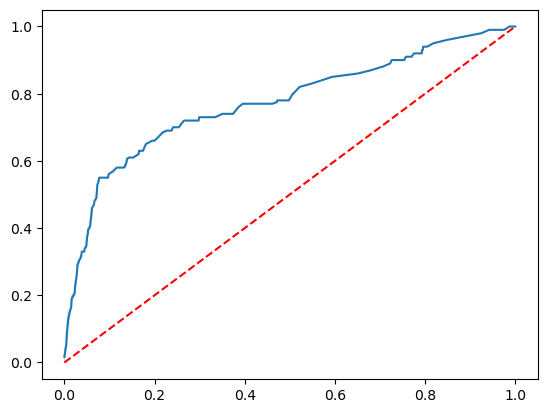

In [290]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x


sns.lineplot(x=especificidad_inv, y=sensibilidad)
sns.lineplot(x= recta_x, y=recta_y, color='red', ls = '--')

In [293]:
roc_auc_score(y_test, y_prediction_proba)

0.7732311827956989